## Projeto 1 - Análise de Algoritmos

### Equipe: 
    Pedro Ivo
    Renan Carneiro

### Resolução da Questão 8
    Insertion Sort comparado com o Insertion Sort com busca binária da Seção 4.

***
#### Importar as Bibliotecas Necessárias

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

#### Função Busca Binária

In [2]:
 def buscaBinaria(array, key, start, end):
    if end - start <= 1:
        if key < array[start]:
            return start - 1
        else:
            return start
 
    mid = (start + end)//2
    if array[mid] < key:
        return buscaBinaria(array, key, mid, end)
    elif array[mid] > key:
        return buscaBinaria(array, key, start, mid)
    else:
        return mid 

#### Função Insertion Sort Binário

In [3]:
def insertionSortBinario(array):
    TempoInicial = time.time()

    for i in range(1, len(array)):
        temp = array[i]
        pos = buscaBinaria(array, temp, 0, i) + 1
 
        for k in range(i, pos, -1):
            array[k] = array[k - 1]
 
        array[pos] = temp
    
    TempoFinal = time.time()
    TempoTotal = TempoFinal - TempoInicial
    
    row[2] = TempoTotal
    
    print("\n--== Insertion Sort Binário ==--")
    print("Tempo de execução:", TempoTotal, "segundos.")
    
    return array

#### Função Insertion Sort Normal

In [4]:
def insertionSort(array):
    TempoInicial = time.time()
    
    for i in range(1, len(array)):
        key = array[i]
        j = i - 1
        
        while j >= 0 and key < array[j]:
            array[j+1] = array[j]
            j -= 1
        array[j+1] = key
    
    TempoFinal = time.time()
    TempoTotal = TempoFinal - TempoInicial
    
    row[1] = TempoTotal
    
    print("\n--== Insertion Sort Normal ==--")
    print("Tempo de execução:", TempoTotal, "segundos.")
    
    return array

#### Gerar um tamanho para o array e criar um data frame vazio para armazenar as comparações

In [5]:
tamanhoArray = np.random.randint(10, 10000, size=(10))
comp_df = pd.DataFrame()

#### Executar as duas funções Insertion Sort

In [6]:
for i in range(len(tamanhoArray)):
    array = np.random.randint(-2*tamanhoArray[i], 2*tamanhoArray[i], size=(tamanhoArray[i]))
    
    row = np.empty(3)
    row[0] = len(array)
    
    print("\nVetor Desordenado: ", array)
    print("Vetor Ordenado: ", insertionSort(array))
    print("\n")

    print("Vetor Ordenado: ", insertionSortBinario(array))
    print("\n") 
    
    comp_df = pd.concat([comp_df, pd.DataFrame(row).T])
    del(row)


Vetor Desordenado:  [-3169 -2484 -2574 ...  -647  2834  2460]

--== Insertion Sort Normal ==--
Tempo de execução: 0.7040214538574219 segundos.
Vetor Ordenado:  [-4336 -4335 -4331 ...  4337  4339  4344]



--== Insertion Sort Binário ==--
Tempo de execução: 0.015624046325683594 segundos.
Vetor Ordenado:  [-4336 -4335 -4331 ...  4337  4339  4344]



Vetor Desordenado:  [ 6604  6427  5510 ...  3890 -1334 -4613]

--== Insertion Sort Normal ==--
Tempo de execução: 2.149113893508911 segundos.
Vetor Ordenado:  [-7792 -7784 -7782 ...  7779  7788  7788]



--== Insertion Sort Binário ==--
Tempo de execução: 0.015617847442626953 segundos.
Vetor Ordenado:  [-7792 -7784 -7782 ...  7779  7788  7788]



Vetor Desordenado:  [ 1571 -1991  1368 ...  -273  -864   958]

--== Insertion Sort Normal ==--
Tempo de execução: 0.24439311027526855 segundos.
Vetor Ordenado:  [-2648 -2648 -2645 ...  2630  2631  2642]



--== Insertion Sort Binário ==--
Tempo de execução: 0.008996725082397461 segundos.
Vetor Orden


--== Insertion Sort Normal ==--
Tempo de execução: 0.8256576061248779 segundos.
Vetor Ordenado:  [-4748 -4731 -4716 ...  4745  4747  4749]



--== Insertion Sort Binário ==--
Tempo de execução: 0.015627384185791016 segundos.
Vetor Ordenado:  [-4748 -4731 -4716 ...  4745  4747  4749]



Vetor Desordenado:  [-11474  -5018   6041 ...  -2418  12769  11062]

--== Insertion Sort Normal ==--
Tempo de execução: 6.195907831192017 segundos.
Vetor Ordenado:  [-13165 -13165 -13162 ...  13158  13163  13164]



--== Insertion Sort Binário ==--
Tempo de execução: 0.046874284744262695 segundos.
Vetor Ordenado:  [-13165 -13165 -13162 ...  13158  13163  13164]



Vetor Desordenado:  [ 1078 -2534  -805 ...  2556 -2739  2285]

--== Insertion Sort Normal ==--
Tempo de execução: 0.24760913848876953 segundos.
Vetor Ordenado:  [-2805 -2802 -2800 ...  2796  2796  2801]



--== Insertion Sort Binário ==--
Tempo de execução: 0.0 segundos.
Vetor Ordenado:  [-2805 -2802 -2800 ...  2796  2796  2801]




#### Nudar o nome das colunas do data frame

In [7]:
comp_df = comp_df.rename({0: 'Tamanho da Entrada', 1: 'Insertion Sort Normal', 2: 'Insertion Sort Binário'}, axis=1)
comp_df = comp_df.reset_index(drop=True)

#### Exibir o data frame com as comparações

In [8]:
display(comp_df)

,Tamanho da Entrada,Insertion Sort Normal,Insertion Sort Binário
0,2173.0,0.704021,0.015624
1,3897.0,2.149114,0.015618
2,1324.0,0.244393,0.008997
3,3784.0,1.950622,0.015625
4,162.0,0.000000,0.000000
5,4198.0,2.419976,0.015626
6,488.0,0.015623,0.015647
7,2375.0,0.825658,0.015627
8,6583.0,6.195908,0.046874
9,1403.0,0.247609,0.000000


#### Ordenar os valores do data frame para representação dos valoros em ordem crescente em um gráfico

In [9]:
comp_df = comp_df.sort_values(by=['Tamanho da Entrada'])
comp_df = comp_df.reset_index(drop=True)

#### Gerar o gráfico do data frame com os tempos de execução por tamanho de entrada

<AxesSubplot:xlabel='Tamanho da Entrada', ylabel='Tempo de Execução (em segundos)'>

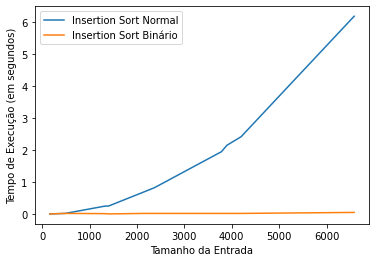

In [10]:
comp_df.plot(x = 'Tamanho da Entrada', xlabel = 'Tamanho da Entrada', ylabel = 'Tempo de Execução (em segundos)')

***
## Conclusão
<div style="text-align: justify">O Insertion Sort é um dos algoritmos de ordenação de implementação mais simples, basicamente, a ordenação por inserção é eficiente para pequenos valores de dados, e para vetores que já estejam totalmente ordenados. É sabido que o Insertion Sort é Θ(n²).
A busca binária é um algoritmo de busca bem performático em buscar um item numa lista ordenada. Ela funciona dividindo repetidamente pela metade uma parte da lista que deve conter o item, e comparar com o item na posição do meio se o item procurado deve estar em uma posição acima ou abaixo da sua, e repetindo até chegar no item buscado. Sabe-se que desde que a lista esteja ordenada a busca binária apresenta complexidade Θ(lg n).
O Insertion Sort com busca binária é um algoritmo de ordenação como o Insertion Sort, mas em vez de usar a pesquisa linear para encontrar o local onde um elemento deve ser inserido, usamos a busca binária. Assim, reduzimos o limite superior da busca de Θ(N) para Θ(log N). Idealmente o Insertion Sort com busca binaria poderia ser dito como Θ(N(lgN)), porém por ter de fazer o shift, ou troca, entre os itens a ser ordenados do array, acaba não sendo Θ(N(lgN)), sendo apenas Θ(N²).
Portanto, tanto o Insertion Sort quanto o Insertion Sort com busca binaria são Θ(N²), porém o Insertion Sort com busca binaria ainda é melhor, mesmo que não o suficiente para ser um Θ de ordem menor, mas ainda performa melhor que o Insertion Sort Padrão como pode-se notar nos testes.</div>